# 単純なグラフを描いて遊んでみる

## ちょっとしたアニメーションサンプル

Firefox ではアニメーションを描画してくれなかった。
Chrome なら OK  なことを確認。

<IPython.core.display.Javascript object>


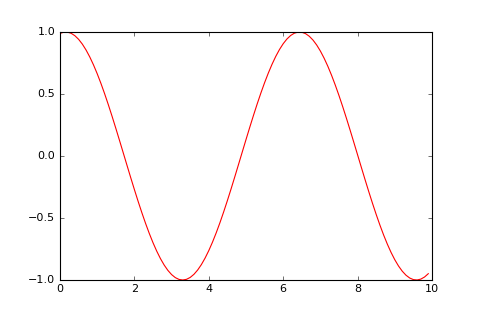

In [25]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
x = np.arange(0, 10, 0.1)

ims = []
for a in range(50):
    y = np.sin(x - a)
    im = plt.plot(x, y, "r")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims)
plt.show()

# グラフ描画

IDLE など interactive shell で対話的にやる場合は pylab の方がいいらしい。

スクリプトに書くなら matplotlib.pyplot の方がいいらしい: こちらは後でやる。

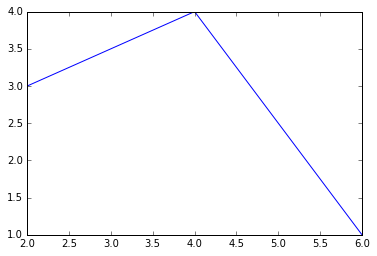

In [8]:
%matplotlib inline
from pylab import plot, show

x_numbers = [2, 4, 6]
y_numbers = [3, 4, 1]

plot(x_numbers, y_numbers)
show()

## 注意
以下しばらく上のコードをロードしていることを前提にしている。

本来、直下のコードを実行するためには次のようにコードが書かれていなければいけない。

~~~~python
%matplotlib inline
from pylab import plot, show

x_numbers = [2, 4, 6]
y_numbers = [3, 4, 1]

plot(x_numbers, y_numbers, marker='o') # marker は 'o', '*', 'x', +' から選べる
show()
~~~~

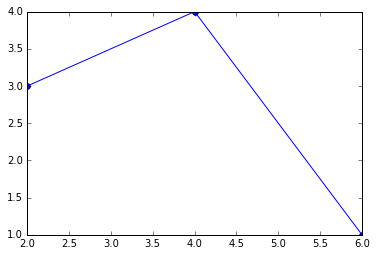

In [11]:
# プロットしたところを強調するマーカーをつけてくれる
plot(x_numbers, y_numbers, marker='o') # marker は 'o', '*', 'x', +' から選べる
show()

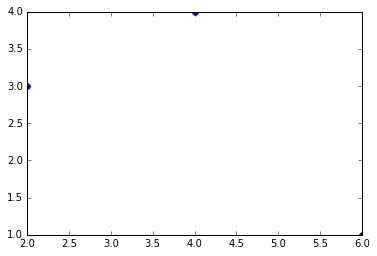

In [12]:
# marker を省くとプロットだけになる
# 点だけなのでものすごく見づらいがきちんと描画されている
plot(x_numbers, y_numbers, 'o')
show()

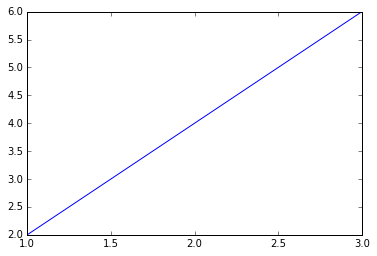

In [9]:
# 直線を引いてみる
x_numbers = [1, 2, 3]
y_numbers = [2, 4, 6]

plot(x_numbers, y_numbers)

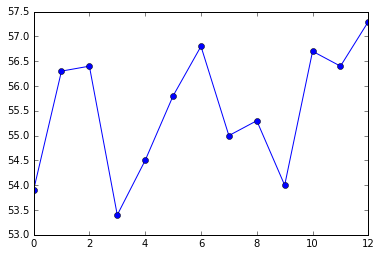

In [14]:
# 適当な折れ線を引く
lst = [53.9, 56.3, 56.4, 53.4, 54.5, 55.8, 56.8, 55.0, 55.3, 54.0, 56.7, 56.4, 57.3]
plot(lst, marker='o')

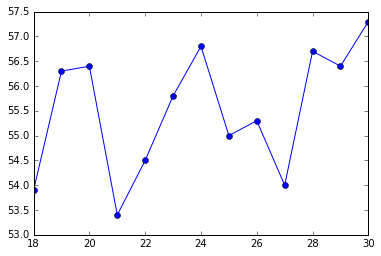

In [15]:
# 横軸を適当に設定
num = 18
h_axis = range(num, num + len(lst))
plot(h_axis, lst, marker='o')

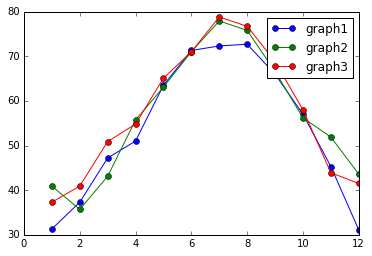

In [22]:
# 複数のグラフを同時に載せる
from pylab import legend

h_axis_multiple = range(1, 13)
lst1 = [31.3, 37.3, 47.2, 51.0, 63.5, 71.3, 72.3, 72.7, 66.0, 57.0, 45.3, 31.1]
lst2 = [40.9, 35.7, 43.1, 55.7, 63.1, 71.0, 77.9, 75.8, 66.6, 56.2, 51.9, 43.6]
lst3 = [37.3, 40.9, 50.9, 54.8, 65.1, 71.0, 78.8, 76.7, 68.8, 58.0, 43.9, 41.5]

plot(h_axis_multiple, lst1, h_axis_multiple, lst2, h_axis_multiple, lst3, marker='o')

# 凡例を追加: legend は plot の下に書かないといけない模様
legend(['graph1', 'graph2', 'graph3'])

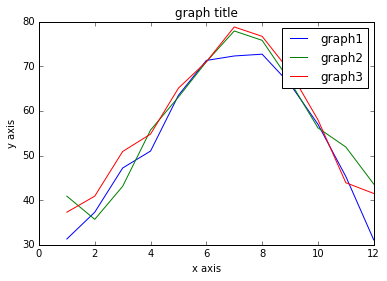

In [24]:
# グラフに色々追加
from pylab import plot, show, title, xlabel, ylabel, legend
plot(h_axis_multiple, lst1, h_axis_multiple, lst2, h_axis_multiple, lst3)

title('graph title')
xlabel('x axis')
ylabel('y axis')
legend(['graph1', 'graph2', 'graph3'])

(-1.0, 13.0, 50.0, 60)

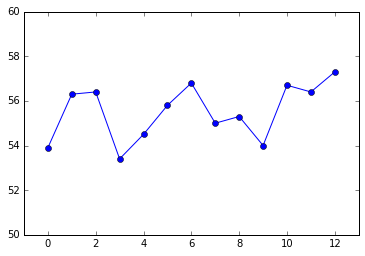

In [29]:
# 軸の表示を変える
from pylab import axis

lst = [53.9, 56.3, 56.4, 53.4, 54.5, 55.8, 56.8, 55.0, 55.3, 54.0, 56.7, 56.4, 57.3]
plot(lst, marker='o')
axis(xmin=-1)
axis(xmax=13)
axis(ymin=50)
axis(ymax=60)
# axis([xmin, xmax, ymin, ymax]) のように一括指定もできる

## pyplot

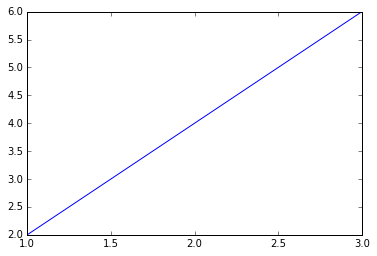

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
x_numbers = [1, 2, 3]
y_numbers = [2, 4, 6]
plt.plot(x_numbers, y_numbers)
plt.show()

# ファイルとして保存できる
#plt.savefig('./fig1.png')
#plt.savefig('./fig1.svg')
#plt.savefig('./fig1.pdf')

## 式をもとにグラフを描く

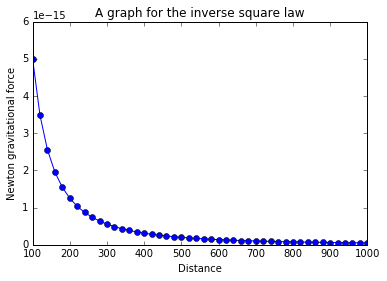

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# 距離の変動範囲
r = range(100, 1001, 20)
# 重力定数
G = 6.674*(10**-11)
# 質量
m1 = 0.5
m2 = 1.5
# 重力
F = [G * (m1 * m2) / (dist ** 2) for dist in r]

plt.plot(r, F, marker='o')
# Jupyter 上日本語が文字化けするようなので英語で書いた
plt.xlabel('Distance')
plt.ylabel('Newton gravitational force')
plt.title('A graph for the inverse square law')
plt.show()

## 物体の投射 (放物線)

初期速度 (m/s): 20
投射角度 (ラジアンでなく度数法で): 30


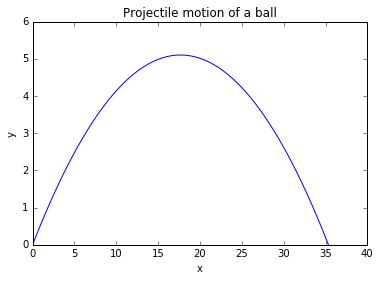

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

def frange(start, final, interval):
    numbers = []
    # float だと range が使えないのでこの処理
    while start < final:
        numbers.append(start)
        start = start + interval

    return numbers

def get_trajectory(v0, theta):
    # 重力定数の定義
    g = 9.8
    
    # 入力の角度をラジアンに変換
    theta = math.radians(theta)
    
    # 着地までの時間の計算
    t_flight = 2 * v0 * math.sin(theta) / g
    
    # 着地時間までの時間リスト: dt 刻み
    dt = 0.001
    intervals = frange(0, t_flight, dt)

    # x, y 座標の計算
    x = []
    y = []
    for t in intervals:
        x.append(v0*math.cos(theta)*t)
        y.append(v0*math.sin(theta)*t - 0.5*g*t*t)

    return (x,y)

try:
    v0 = float(input('初期速度 (m/s): '))
    theta = float(input('投射角度 (ラジアンでなく度数法で): '))
except ValueError:
    print('入力値が不正')
else:
    tragectory = get_trajectory(v0, theta)

    plt.plot(tragectory[0], tragectory[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Projectile motion of a ball')
    plt.show()

## 複数の放物線を重ねる

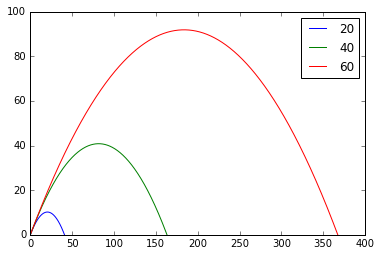

In [67]:
# List of three different initial velocities
v0_list = [20, 40, 60]
theta = 45
tragectories = []

for v0 in v0_list:
    tragectories.append(get_trajectory(v0, theta))

# Add a legend and show the graph
plt.plot(tragectories[0][0], tragectories[0][1],
         tragectories[1][0], tragectories[1][1],
         tragectories[2][0], tragectories[2][1])
plt.legend(['20', '40', '60'])
plt.show()

## csv 読み込みしてデータ処理
該当 csv は同じディレクトリにある前提: densities.csv

[1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065, 1070, 1075, 1080, 1085, 1090, 1095, 1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150, 1155, 1160, 1165, 1170]
[10, 23, 36, 50, 63, 76, 90, 103, 116, 130, 143, 156, 170, 183, 196, 210, 223, 236, 250, 263, 276, 290, 303, 317, 330, 344, 357, 370, 383, 397, 410, 423]
データで一番近い値:  1065
データで一番近い砂糖の量 (g/l):  143
砂糖の量の実測値 (g/l):  1068
線型補間した砂糖の量 (g/l):  150.8
最小 2 乗法での調整
r^2: 0.999993
直線: y = 2.67 x +  -2700.00
測定値 (密度): 1068
最小 2 乗法で調整した砂糖の量: 151.1


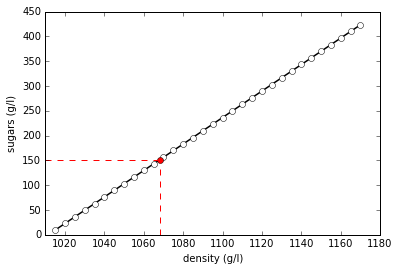

In [2]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

densities = []
gl = []
# with で読むと例外が出ても安全にファイルを閉じてくれる
with open('densities.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    i = 0
    for r in spamreader:
        if i > 0:
            densities.append(int(r[0]))
            gl.append(int(r[1]))
        i += 1
print(densities)
print(gl)

"""線型補間"""
# 実測値
measured_density = 1068
# csv で何番目の値を取るかを決めるための添字
j = 0
# 実測値より小さい中で一番近い値を取得
# csv のデータは小さい順にソートされていることが前提
for i, datum in enumerate(densities):
    if datum < measured_density:
        # 値が小さいうちはデータ更新
        dant = datum
        j = i

# 実測値より小さい中で一番近い値
print('データで一番近い値: ', dant)
glant = gl[j]
print('データで一番近い砂糖の量 (g/l): ', glant)
f = np.round(glant + ((measured_density - dant) * (gl[j + 1] - gl[j]) / 5.0), 1)
print('砂糖の量の実測値 (g/l): ', measured_density)
print('線型補間した砂糖の量 (g/l): ', "%.1f" % f)

"""最小 2 乗法"""
print('最小 2 乗法での調整')
slope, intercept, r_value, p_value, std_err = stats.linregress(densities, gl)
print('r^2: {:8.6f}'.format(r_value ** 2))
print('直線: y = {:.2f} x +  {:.2f}'.format(slope, intercept))
print('測定値 (密度): {}'.format(measured_density))
f2 = np.round(slope * measured_density + intercept, 1)
print ('最小 2 乗法で調整した砂糖の量: {:.1f}'.format(f2))

# グラフの描画
f0 = slope * densities[0] + intercept
fn = slope * densities[-1] + intercept
# 線型補間
plt.plot([densities[0], densities[-1]], [f0, fn], 'k-', lw=1.5) # lw は linewidth
plt.plot(densities, gl, 'wo')
plt.xlim(1010, 1180)
plt.plot(measured_density, f2, 'ro')
# 実測値に赤線を引く
plt.plot([measured_density, measured_density], [0, f2], 'r--', lw=1.0)
plt.plot([1010, measured_density], [f2, f2], 'r--', lw=1.0)
plt.xlabel('density (g/l)')
plt.ylabel('sugars (g/l)')
plt.show()

## ファンデルワールスの状態方程式
\begin{align}
(P + \frac{a}{V^2})(V-b) = RT.
\end{align}

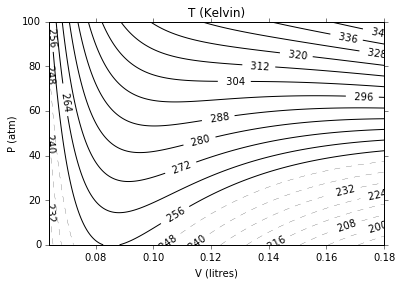

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

# ファンデルワールスの状態方程式のパラメータ指定
a = 3.592
b = 0.0427
R = 0.08206

# パラメータ数
pointsnum = 1000

# 体積と圧力のパラメータ指定
# 体積は x 軸, 圧力は y 軸
v = np.linspace(0.064, 0.18, pointsnum)
p = np.linspace(0, 100.0, pointsnum)
X, Y = np.meshgrid(v, p)

# 状態方程式から温度を計算
Z = (Y + (a / X ** 2)) * (X - b) / R

# グラフ描画
plt.figure()
CS = plt.contour(X, Y, Z, 25, linewidth=1.0, colors='k')
zc = CS.collections[0:8]
plt.setp(zc, linewidth=0.2, linestyle='dashed')
# contour に対するラベリング
plt.clabel(CS, inline=1, fontsize=10, fmt='%4.0f')
plt.title('T (Kelvin)')
plt.xlabel('V (litres)')
plt.ylabel('P (atm)')
plt.show()

## 3D グラフ

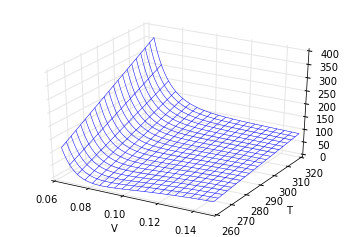

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# ファンデルワールスの状態方程式のパラメータ
a = 3.592
b = 0.0427
R = 0.08206

# パラメータ数
pointsnumber = 500
# 体積は x 軸
v = np.linspace(0.064, 0.15, pointsnumber)
# 温度は y 軸
t = np.linspace(260, 320, pointsnumber)
X, Y = np.meshgrid(v, t)
# 温度が z 軸
Z = (R * Y / (X - b)) - (a / X ** 2)

ax.plot_wireframe(X, Y, Z, rstride=25, cstride=25, lw=0.5, color='b')

plt.xlabel('V')

plt.ylabel('T')
plt.show()